# Examples using numpy arrays and matplotlib

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import city_utils as cu

Hey I am a module!


In [3]:
cities = cu.load_cities()

In [4]:
len(cities)

1000

In [5]:
cities[0]

{'city': 'New York',
 'growth_from_2000_to_2013': '4.8%',
 'latitude': 40.7127837,
 'longitude': -74.0059413,
 'population': '8405837',
 'rank': '1',
 'state': 'New York'}

In [6]:
names = np.array([city['city'] for city in cities])
states = np.array([city['state'] for city in cities])

In [7]:
longitude = np.array([city['longitude'] for city in cities])

In [8]:
latitude = np.array([city['latitude'] for city in cities])

In [9]:
population = np.array([float(city['population']) for city in cities])

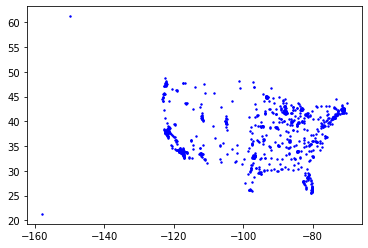

In [10]:
plt.scatter(longitude, latitude, c='b', s=2)

In [11]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequen

Text(0, 0.5, 'number of cities')

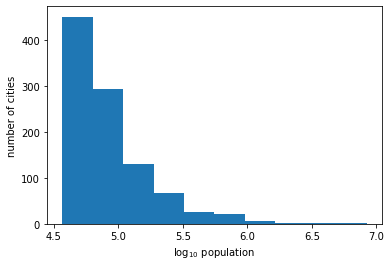

In [12]:
plt.hist(np.log10(population));
plt.xlabel('$\log_{10}$ population')
plt.ylabel('number of cities')

Text(0, 0.5, 'latitude')

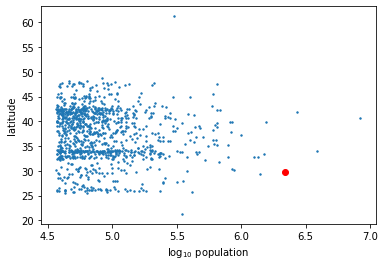

In [13]:
plt.scatter(np.log10(population), latitude, s=2)
plt.scatter(np.log10(population[3]), latitude[3], c='r')
plt.xlabel('$\log_{10}$ population')
plt.ylabel('latitude')

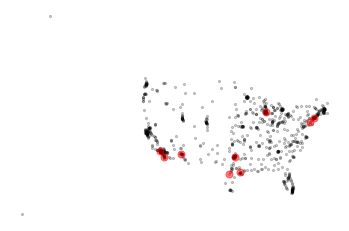

In [14]:
# plot cities with populations of 1 million
ix = population > 1_000_000
plt.scatter(longitude, latitude, c='k', s=5, alpha=0.2)
plt.scatter(longitude[ix], latitude[ix], s=50, c='r', alpha=0.5)
plt.axis(False);

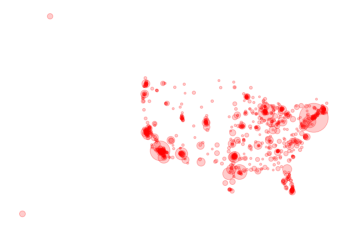

In [15]:
# plot cities with size proportional to population
plt.scatter(longitude, latitude, c='r', s=population / 10_000, alpha=0.2)
plt.axis(False);

In [16]:
growth = np.array(
    [float(np.nan if not city['growth_from_2000_to_2013'] else city['growth_from_2000_to_2013'].rstrip('%')) for city in cities])

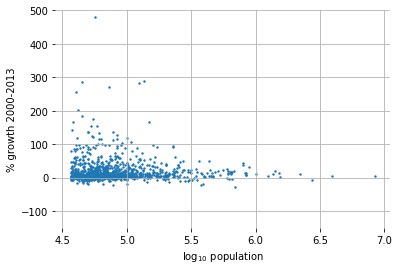

In [17]:
plt.scatter(np.log10(population), growth, s=2)
plt.ylim([-150, 500])
plt.xlabel('$\log_{10}$ population')
plt.ylabel('% growth 2000-2013')
plt.grid(True)
plt.box(False)